## Decision Tree portion of model.py exercises

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
## need to install graphviz to anaconda
## example: 

# from sklearn.datasets import load_iris

# iris = load_iris()
# clf = DecisionTreeClassifier()
# clf = clf.fit(iris.data, iris.target)

# import graphviz

# from graphviz import Graph

# dot_data = export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 

# graph.render('iris_decision_tree', view=True)

In [3]:
# Starting with doing the curriculum examples before doing the exercises:

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
df.columns = [col.lower().replace('.', '_') for col in df]

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


([array([ 0., 24., 26.,  0.,  5., 14., 30., 26., 19.,  6.]),
  array([50., 36., 47., 17.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([0.1 , 0.78, 1.46, 2.14, 2.82, 3.5 , 4.18, 4.86, 5.54, 6.22, 6.9 ]),
 <a list of 2 Lists of Patches objects>)

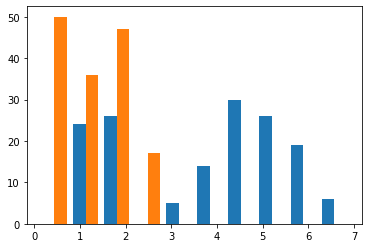

In [6]:
plt.hist((df.petal_length, df.petal_width))

In [11]:
# Splitting the data:

X = df.drop(['species'],axis=1)
y = df[['species']]

# Split into train, validate, and test datasets
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)


X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
57,6.3,3.3,4.7,1.6
41,5.0,3.5,1.3,0.3
71,5.9,3.2,4.8,1.8
24,5.1,3.3,1.7,0.5
140,6.9,3.1,5.4,2.1


In [12]:
# for classification you can change the algorithm to gini or entropy (information gain).  Default is gini.
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [14]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['versicolor', 'setosa', 'virginica', 'setosa', 'virginica'],
      dtype=object)

In [15]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.25      , 0.75      ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.25      , 0.75      ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.25      , 0.75      ],
       [1.

In [16]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [17]:
confusion_matrix(y_train, y_pred)

array([[26,  0,  0],
       [ 0, 29,  2],
       [ 0,  0, 27]])

In [18]:
sorted(y_train.species.unique())

['setosa', 'versicolor', 'virginica']

In [19]:
y_train.species.value_counts()

versicolor    31
virginica     27
setosa        26
Name: species, dtype: int64

In [20]:
import pandas as pd

labels = sorted(y_train.species.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,setosa,versicolor,virginica
setosa,26,0,0
versicolor,0,29,2
virginica,0,0,27


In [21]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        26
  versicolor       1.00      0.94      0.97        31
   virginica       0.93      1.00      0.96        27

    accuracy                           0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



In [22]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on test set: 0.97
